In [1]:
%autosave 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Autosaving every 2 seconds


[-1.  2.  3.]
[-0.77899058  1.71200928  3.04787281]
length 4.52552518093 t_air 0.947117610298 v(0.5) 5.99185274855


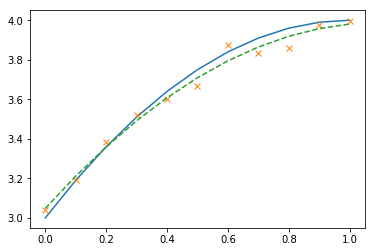

In [9]:
x = np.r_[0:1:11j]
p_actual = -np.poly((-1, 3))  # -x^2 + 2x + 3
print(p_actual)
y_actual = np.polyval(p_actual, x)
y_noised = y_actual + np.random.uniform(-0.1, 0.1,
                                        size=y_actual.shape)
plt.plot(x, y_actual, '-', x, y_noised, 'x')

p = np.polyfit(x, y_noised, deg=2)
print(p)
y = np.polyval(p, x)
plt.plot(x, y, '--')

x1, x2 = np.roots(p)
length = abs(x2 - x1)
y_max = -p[1] / (2 * p[0])
g = 9.8
t_max = np.sqrt(2 * y_max / g)
t_air = 2 * t_max
v_x = length / t_air
v_y0 = g * t_max
phi0 = np.arctan(2 * p[0] * x1 + p[1])  # v_y0 / vx
def t(x):
    return x / v_x
def v_y(x):
    return v_y0 - g * t(x)
def v(x):
    return np.sqrt(v_x**2 + v_y(x)**2)

print('length', length, 't_air', t_air, 'v(0.5)', v(0.5))

In [15]:
def find_orbit(x, y_noised):
    p = np.polyfit(x, y_noised, deg=2)
    return p
#     y = np.polyval(p, x)

def find_vx(p, x_v):
    x1, x2 = np.roots(p)
    length = abs(x2 - x1)
    y_max = -p[1] / (2 * p[0])
    g = 9.8
    t_max = np.sqrt(2 * y_max / g)
    t_air = 2 * t_max
    v_x = length / t_air
    v_y0 = g * t_max
    phi0 = np.arctan(2 * p[0] * x1 + p[1])  # v_y0 / vx
    def t(x):
        return x / v_x
    def v_y(x):
        return v_y0 - g * t(x)
    def v(x):
        return np.sqrt(v_x**2 + v_y(x)**2)
    return (length, t_air, v(x_v))

orbit = find_orbit(x, y_noised)
_, _, v_x = find_vx(orbit, 0.5)
print(v_x)

5.99185274855


In [30]:
class Orbit:
    g = 9.8
    
    def __init__(self, x, y_noised):
        self.p = np.polyfit(x, y_noised, deg=2)
        x1, x2 = np.roots(p)
        self.length = abs(x2 - x1)
        self.y_max = -self.p[1] / (2 * self.p[0])
        self.t_max = np.sqrt(2 * self.y_max / self.g)
        self.t_air = 2 * self.t_max
        self.v_x = self.length / self.t_air
        self.v_y0 = self.g * self.t_max
        self.phi0 = np.arctan(2 * self.p[0] * x1 + self.p[1])  # v_y0 / vx

    def t(self, x):
        return x / self.v_x
    
    def v_y(self, x):
        return self.v_y0 - self.g * self.t(x)
    
    def v(self, x):
        return np.sqrt(self.v_x**2 + self.v_y(x)**2)
    
    def __repr__(self):
        return 'orbit instance'
    
    def __str__(self):
        return 'Orbit, horizontal speed {:.3f}'.format(self.v_x)


orbit = Orbit(x, y_noised)
print(orbit.v_x)
print(orbit.v(0.5))
print(str(orbit))
orbit

4.77820825178
5.99185274855
Orbit, horizontal speed 4.778


orbit instance

In [ ]:
np.math.factorial